## Overview
In the next unit you will learn that many statistical tests are based on the so-called assumption of normality. This means that the population from which a sample is drawn is assumed to be normal. As we already saw, when a statistical test is performed on a sample statistic such as the sample mean, the central limit theorem guarentees that the distribution of sample means is normal if the sample size is sufficiently large. Since many statistical tests are performed on the distribution of sample means, this would suggest the assumpiton of a normally distriubted population is overly conservative if the sample size is sufficiently large. So, why does it even matter if the population is normally distributed if the test is not performed on the population but a statistic (usually mean) calculated from a sample? One answer to this question is that it probably (usually) doesn't matter much if the sample size is sufficiently large but many scientists don't care; they want things done according to convention and best practices, whatever that means. We like to be draconian with our rules even when those rules are somewhat arbitrary (p-value of 0.05 instead of say 0.06 or 0.047777). Another answer to this question is that we often estimate two things from a sample, the sample mean and the standard deviation of this mean (standard error). It turns out that these two estimates are only independent if the population from which the sample is drawn from is normally distributed. So, if we wish to estimate confidence intervals or perform t-tests and estimate p-values for a sample mean we need to assume the population is normally distributed. Along these same lines, it turns out that some tests between two independent samples assume the variance of the populations from which these two samples were drawn are equal. After this notebook you will know:
* how to use a sample to estimate if the population from which it is drawn from is normally distributed.
* how to test is two samples came from populations with equal varience.

In [1]:
# Python uses packages to simplify data manipulation and analysis. Three of the most important packages
# are called Numpy, Pandas, and Matplotlib
import numpy as np # linear algebra and data processing
import pandas as pd # data processing and file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for ploting data
import seaborn as sns # makes even nicer plots (might use, don't know)

The following cell will import the cereal data set using pandas. The data is linked to above and is formated as a CSV (comma-separated-values) file. Such a file could be opend in Excel but here we simply load the file into a pandas data structure called a dataframe and print out the first couple rows of the dataframe.

In [23]:
url = "https://raw.githubusercontent.com/prof-groff/evns462/master/data/cereal.csv"
cereal = pd.read_csv(url)
print(cereal.head())

                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    8.0       8     135         0      3     1.0  1.00  33.983679  
2    7.0       5     320        25      3     1.0  0.33  59.425505  
3    8.0       0     330        25      3     1.0  0.50  93.704912  
4   14.0       8      -1        25      3     1.0  0.75  34.384843  


## Test for Normality
There are several popularly used tests for normality, each with strengths and weaknesses. Perhaps the most widely used test is called Shapiro-Wilk. Another is called the Kolmogorov–Smirnov (K-S) Test. A third is called the Anderson-Darling Test
* **Shapiro-Wilk:** Probably the best all around test for normality. It can be perfomed in python using the `scipy.stats.shapiro()` function.
* **Kolmogorov–Smirnov:** The K-S test compares a sample to a continuous known distribution with specified mean and standard deviation. Computational research shows that the K-S test is less powerful then Shapiro-Wilk and Anderson-Darling. The K-S test can be performed in python using the `scipy.stats.kstest()` function.
* **Anderson-Darling:** This test is usually better than the K-S test but not as good as the Shapiro-Wilk test. It can be performed in python using the `scipy.stats.anderson()` function.

Note that all of these statistical tests for normality assumes the null hypothesis that the distrubution the sample was drawn from was normal. So, if the p-value is less than 0.05 we reject the null and accept the alternative hypothesis that the sample was NOT drawn from a normal distribution. So, we are 'hoping' for a p-value greater than 0.05 if we want to use a so-called parametric test. Let's compare the results of these three tests on the cereal sodium data.

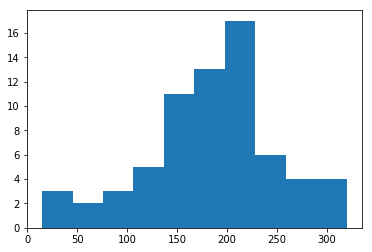

Shapiro-Wilk:
statistic:  0.9771600961685181 , p-value:  0.2455652505159378
Anderson-Darling:
statistic:  0.489326046673 , critical values:  [ 0.547  0.623  0.747  0.871  1.037] , significance levels:  [ 15.   10.    5.    2.5   1. ]
Kolmogorov-Smirnov:
statistic:  0.0799829047226 , p-value:  0.795644605358


In [45]:
import scipy.stats as stats # some useful stuff

x = cereal[cereal["sodium"]>0]["sodium"] # only look at values > 0 because some are not given (0)
plt.hist(x,bins=10)
plt.show()


# shapiro-wilk
statistic, pvalue = stats.shapiro(x)
print("Shapiro-Wilk:")
print("statistic: ", statistic, ", p-value: ", pvalue)

# anderson-darling
statistic, critical_values, significance_level = stats.anderson(x, dist='norm')
print("Anderson-Darling:")
print("statistic: ", statistic, ", critical values: ", critical_values, ", significance levels: ", significance_level)

# kolmogorov-smirnov
statistic, pvalue = stats.kstest((x-x.mean())/x.std(ddof=1), cdf='norm') # have to scale and normalize
print("Kolmogorov-Smirnov:")
print("statistic: ", statistic, ", p-value: ", pvalue)


## Test for Equivelence of Variance
When performing some statistical tests such as the independent samples t-test, it is assumed that the variances of the populations from which each sample was drawn are equivelent. One statistical test commonly used to test this assumption is called the **Levene Test**. The null hypothesis of this test is that the variances across samples are equivlenent to a p-value of less than 0.05 would result in rejecting the null hypothesis and the assumption of equal varience would NOT be taken. Below the Levene Test is conducted on the sodium data from GM and Kellogs cereals.

In [52]:
gm = cereal[cereal['mfr']=='G']['potass']
k = cereal[cereal['mfr']=='K']['potass']
statistic, pvalue = stats.levene(gm,k)
print("statistic: ", statistic, ", p-value: ", pvalue)

statistic:  3.4909822563 , p-value:  0.0685268603588
